# <p style="color:red;">  Opioids and Drug-Related Deaths  
    
## DSC 540 | Advanced Machine Learning 
## Exploratory Data Analysis

### <p style="color:gray;"> Libraries

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import geopandas as gpd
import plotly.express as px

## <p style="color:purple;"> Connecticut Medicare Part_D Opioid Prescriber Summary File 2014 Dataset

In [195]:
df = pd.read_csv('../Data/Connecticut_Medicare_Part_D_Opioid_Prescriber_Summary_File_2014.csv')

In [196]:
df.head()

,NPI,NPPES Provider Last/Org Name,NPPES Provider First Name,NPPES Provider Zip Code,NPPES Provider State,Specialty Description,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate
0,1952310666,A'BODJEDI,ENENGE,6902,CT,Psychiatry,4476,0.0,0.00%
1,1922419209,AAMAR,ALI,6708,CT,Student in an Organized Health Care Education/...,91,NaN,NaN
2,1336297894,AARON,STUART,6880,CT,Ophthalmology,388,0.0,0.00%
3,1417991456,AARONSON,BETH,6810,CT,Physical Medicine and Rehabilitation,378,123.0,32.54%
4,1285925305,AARONSON,NICOLE,6510,CT,Student in an Organized Health Care Education/...,87,19.0,21.84%


In [197]:
#Adding leading zero to Zip Codes
df['NPPES Provider Zip Code'] = df['NPPES Provider Zip Code'].astype(str)
df['NPPES Provider Zip Code'] = df['NPPES Provider Zip Code'].str.zfill(5)
df['NPPES Provider Zip Code'].head()

0    06902
1    06708
2    06880
3    06810
4    06510
Name: NPPES Provider Zip Code, dtype: object

- NPPES (National Plan and Provider Enumeration System)  
  
    - The Administrative Simplification provisions of the Health Insurance Portability and Accountability Act of 1996 (HIPAA) mandated the adoption of standard unique identifiers for health care providers and health plans.  
      
    - The purpose of these provisions is to improve the efficiency and effectiveness of the electronic transmission of health information. The Centers for Medicare & Medicaid Services (CMS) has developed the National Plan and Provider Enumeration System (NPPES) to assign these unique identifiers.

In [198]:
df.shape

(16506, 9)

In [199]:
df.columns

Index(['NPI', 'NPPES Provider Last/Org Name', 'NPPES Provider First Name',
       'NPPES Provider Zip Code', 'NPPES Provider State',
       'Specialty Description', 'Total Claim Count', 'Opioid Claim Count',
       'Opioid Prescribing Rate'],
      dtype='object')

In [200]:
#Chnaging column name for ZIPCode
df.columns = ['NPI', 'NPPES Provider Last/Org Name', 'NPPES Provider First Name',
       'ZIPCode', 'NPPES Provider State',
       'Specialty Description', 'Total Claim Count', 'Opioid Claim Count',
       'Opioid Prescribing Rate']

In [201]:
#Cleaning the Percentage Column
def p2f(x):
    return float(x.strip('%'))/100

rate = list(df['Opioid Prescribing Rate'])

new_rates = []
for n in rate:
    if isinstance(n,str):
        n_new = p2f(n)
        new_rates.append(n_new)
    else:
        new_rates.append(n)
new_rates

df['Opioid Prescribing Rate'] = new_rates
df.head()

,NPI,NPPES Provider Last/Org Name,NPPES Provider First Name,ZIPCode,NPPES Provider State,Specialty Description,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate
0,1952310666,A'BODJEDI,ENENGE,06902,CT,Psychiatry,4476,0.0,0.0000
1,1922419209,AAMAR,ALI,06708,CT,Student in an Organized Health Care Education/...,91,NaN,NaN
2,1336297894,AARON,STUART,06880,CT,Ophthalmology,388,0.0,0.0000
3,1417991456,AARONSON,BETH,06810,CT,Physical Medicine and Rehabilitation,378,123.0,0.3254
4,1285925305,AARONSON,NICOLE,06510,CT,Student in an Organized Health Care Education/...,87,19.0,0.2184


### Column Descriptions (Self-Made)

- **NPI**: NPI (National Provider Identifier) Number is a 10-digit numerical identifier used to identify an individual provider or a health care entity. An NPI number is shared with other providers, employers, health plans, and payers. (Unique Identifer)
- **NPPES Provider Last/Org Name**: Last Name or Organization Name of the NPPES Provider
- **NPPES Provider First Name**: First Name of the NPPES Provider
- **NPPES Provider Zip Code**: ZIP Code of the NPPES Provider
- **NPPES Provider State**: State of the NPPES Provider 
- **Speciality Description**: Brief description of the health providers practice (what they specialize in)
- **Total Claim Count**:  The total count the NPPES has claimed claimed 
- **Opioid Claim Count**: Subset of the claim count, count of claims that are Opioid related
- **Opioid Prescribing Rate**:  *Opioid Claim Count* / *Total Claim Count*

### <span style="color:green"> **Where in Connecticut is our data coming from?** </span>  

#### <span style="color:green"> *NPPES Provider State + ZIP Code Analysis* </span>  


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16506 entries, 0 to 16505
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   NPI                           16506 non-null  int64  
 1   NPPES Provider Last/Org Name  16504 non-null  object 
 2   NPPES Provider First Name     16506 non-null  object 
 3   ZIPCode                       16506 non-null  object 
 4   NPPES Provider State          16506 non-null  object 
 5   Specialty Description         16506 non-null  object 
 6   Total Claim Count             16506 non-null  int64  
 7   Opioid Claim Count            10896 non-null  float64
 8   Opioid Prescribing Rate       10896 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.1+ MB


In [203]:
df.isna().sum()

NPI                                0
NPPES Provider Last/Org Name       2
NPPES Provider First Name          0
ZIPCode                            0
NPPES Provider State               0
Specialty Description              0
Total Claim Count                  0
Opioid Claim Count              5610
Opioid Prescribing Rate         5610
dtype: int64

In [204]:
df['Opioid Prescribing Rate'].value_counts()

0.0000    4425
0.5000      36
0.3333      20
0.0258      16
0.0270      13
          ... 
0.4177       1
0.0151       1
0.3942       1
0.2568       1
0.6862       1
Name: Opioid Prescribing Rate, Length: 2962, dtype: int64

In [205]:
df['ZIPCode'].value_counts()

06510    1217
06030     682
06810     622
06511     552
06105     497
         ... 
06794       1
06853       1
06376       1
06782       1
06752       1
Name: ZIPCode, Length: 274, dtype: int64

In [206]:
#Import CT json geopandas df
ct = gpd.read_file('../Data/ct_connecticut_zip_codes_geo.min.json')
ct.head()
ct.columns = ['STATEFP10', 'ZIPCode', 'GEOID10', 'CLASSFP10', 'MTFCC10',
       'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10',
       'PARTFLG10', 'geometry']

In [207]:
ct['coords'] = ct['geometry'].apply(lambda x: x.representative_point().coords[:])
ct['coords'] = [coords[0] for coords in ct['coords']]

In [208]:
##Groupby Zip Code and find avg prescribe rate per ZIPCode
df1 = pd.DataFrame(df.groupby('ZIPCode',dropna = True).mean())
df1 = df1.drop('NPI',axis = 1)
print(df1.head())
print(df1.shape)

         Total Claim Count  Opioid Claim Count  Opioid Prescribing Rate
ZIPCode                                                                
00648           634.000000                 NaN                      NaN
03651            18.000000              0.0000                 0.000000
03681          1582.000000                 NaN                      NaN
05902            40.000000                 NaN                      NaN
06001           896.793388             40.8125                 0.082719
(274, 3)


In [209]:
#merge our aggregated (by ZIPCode) df with the geometry df for map drawing
map_df = ct.merge(df1, on='ZIPCode')
map_df.shape

(235, 16)

In [210]:
map_df.isna().sum()

STATEFP10                  0
ZIPCode                    0
GEOID10                    0
CLASSFP10                  0
MTFCC10                    0
FUNCSTAT10                 0
ALAND10                    0
AWATER10                   0
INTPTLAT10                 0
INTPTLON10                 0
PARTFLG10                  0
geometry                   0
coords                     0
Total Claim Count          0
Opioid Claim Count         9
Opioid Prescribing Rate    9
dtype: int64

In [211]:
map_df.columns

Index(['STATEFP10', 'ZIPCode', 'GEOID10', 'CLASSFP10', 'MTFCC10', 'FUNCSTAT10',
       'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'PARTFLG10',
       'geometry', 'coords', 'Total Claim Count', 'Opioid Claim Count',
       'Opioid Prescribing Rate'],
      dtype='object')

In [212]:
#fill na values with the mean of the respective column
map_df['Opioid Prescribing Rate'].fillna(map_df['Opioid Prescribing Rate'].mean(),inplace = True)
map_df['Opioid Claim Count'].fillna(map_df['Opioid Claim Count'].mean(),inplace = True)

<ipython-input-213-e4ad93696fb9>:10: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ct_opioid_rate.annotate(s=row['ZIPCode'], xy=row['coords'],


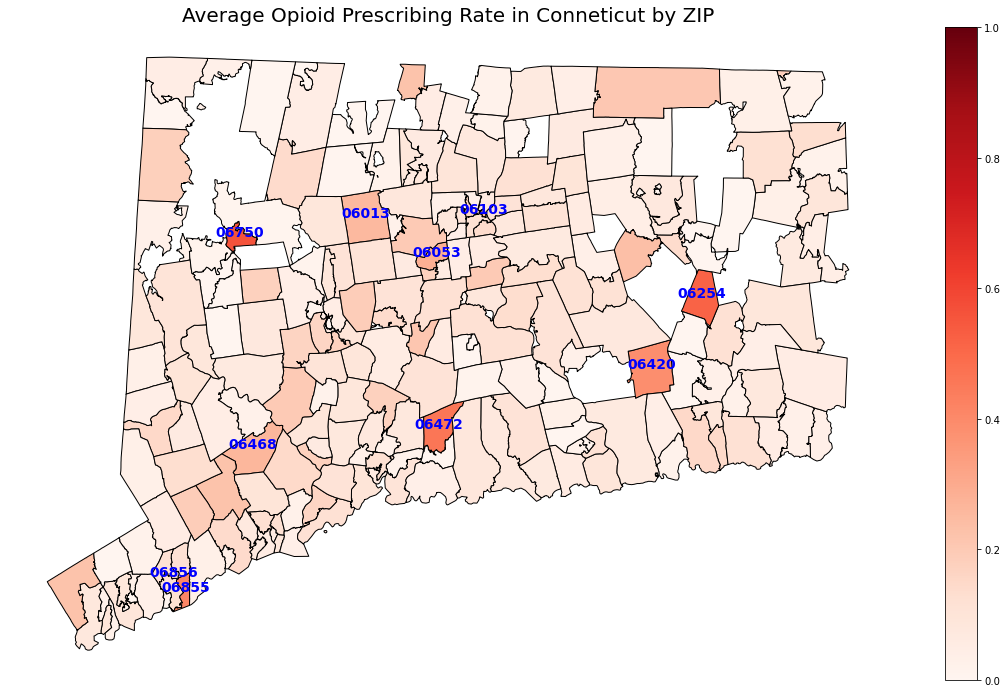

In [213]:
#Plot the map
ct_opioid_rate = map_df.plot(column = map_df['Opioid Prescribing Rate'],cmap = 'Reds',edgecolor = 'black',figsize=(20,12),
                        legend = True,vmin = 0,vmax = 1)

ct_opioid_rate.axis('off')
ct_opioid_rate.set_title("Average Opioid Prescribing Rate in Conneticut by ZIP",fontsize = 20)

for idx, row in map_df.iterrows():
    if row['Opioid Prescribing Rate'] > 0.25:
        ct_opioid_rate.annotate(s=row['ZIPCode'], xy=row['coords'],
                     horizontalalignment='center',fontsize = 14,weight = 'bold',color ='blue') 

In [214]:
#average rate
map_df['Opioid Prescribing Rate'].mean()

0.08705390742838219

In [215]:
#Quick statistics on our columns on interest
map_df.describe()[['Total Claim Count','Opioid Claim Count','Opioid Prescribing Rate']]

,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate
count,235.000000,235.000000,235.000000
mean,1222.062514,79.199771,0.087054
std,1227.188846,94.589424,0.084509
min,13.000000,0.000000,0.000000
25%,456.848353,29.970238,0.029600
50%,974.636364,59.712177,0.072538
75%,1550.088690,90.590439,0.117297
max,8456.000000,829.000000,0.562000


In [216]:
#Top 20 Zip Codes in CT with respect to the Opioid Prescribing Rates
sort = pd.DataFrame(map_df.sort_values(by = 'Opioid Prescribing Rate',ascending = False))
sort[['ZIPCode','Opioid Prescribing Rate']].head(20)

,ZIPCode,Opioid Prescribing Rate
195,06750,0.562000
109,06254,0.517558
135,06472,0.462000
210,06855,0.412500
76,06420,0.387100
66,06103,0.287978
92,06053,0.285871
123,06856,0.265923
5,06468,0.263757
90,06013,0.256050


### <span style="color:green"> **What kind of practices prescribe Opioids in CT?** </span>  

#### <span style="color:green"> *Specialty Description + Opioid Prescribing Rate* </span> 

In [226]:
for item in df['Specialty Description']:
    print(item)

Psychiatry
Student in an Organized Health Care Education/Training Program
Ophthalmology
Physical Medicine and Rehabilitation
Student in an Organized Health Care Education/Training Program
Gastroenterology
Rheumatology
Nurse Practitioner
Nurse Practitioner
Gastroenterology
Emergency Medicine
Neurosurgery
Family Practice
Allergy/Immunology
Certified Nurse Midwife
Specialist
Physical Medicine and Rehabilitation
Emergency Medicine
Dentist
Internal Medicine
Internal Medicine
Student in an Organized Health Care Education/Training Program
Student in an Organized Health Care Education/Training Program
Gastroenterology
Internal Medicine
Obstetrics/Gynecology
Nurse Practitioner
Student in an Organized Health Care Education/Training Program
Student in an Organized Health Care Education/Training Program
Internal Medicine
Dentist
Dentist
Rheumatology
Rheumatology
Physical Medicine and Rehabilitation
Internal Medicine
Internal Medicine
Oral Surgery (dentists only)
Student in an Organized Health Care

Student in an Organized Health Care Education/Training Program
Student in an Organized Health Care Education/Training Program
General Practice
Cardiology
Internal Medicine
Psychiatry & Neurology
Hematology/Oncology
Vascular Surgery
General Surgery
Nephrology
Internal Medicine
Neurosurgery
Pulmonary Disease
Nurse Practitioner
Dermatology
Dentist
Nurse Practitioner
Dentist
Emergency Medicine
Plastic and Reconstructive Surgery
Internal Medicine
Psychiatry & Neurology
Dentist
Internal Medicine
Student in an Organized Health Care Education/Training Program
Internal Medicine
Nurse Practitioner
Dentist
Dentist
Nurse Practitioner
Internal Medicine
Physician Assistant
Neuropsychiatry
Emergency Medicine
Dentist
Dentist
General Practice
Nurse Practitioner
Dentist
Optometry
Orthopedic Surgery
Internal Medicine
Nurse Practitioner
Nurse Practitioner
Nurse Practitioner
Physician Assistant
Physician Assistant
Allergy/Immunology
Emergency Medicine
Nurse Practitioner
Pulmonary Disease
Internal Medicine


Obstetrics/Gynecology
Otolaryngology
Psychiatry
Student in an Organized Health Care Education/Training Program
Student in an Organized Health Care Education/Training Program
Student in an Organized Health Care Education/Training Program
Emergency Medicine
Nurse Practitioner
Obstetrics & Gynecology
Emergency Medicine
Student in an Organized Health Care Education/Training Program
Family Practice
Psychiatry
Obstetrics/Gynecology
Nurse Practitioner
Dentist
Physician Assistant
Student in an Organized Health Care Education/Training Program
Ophthalmology
Dentist
Urology
Obstetrics/Gynecology
Nurse Practitioner
Neurology
Nurse Practitioner
Interventional Pain Management
Sports Medicine
Cardiology
Internal Medicine
Internal Medicine
Nurse Practitioner
Ophthalmology
Family Practice
Optometry
Nurse Practitioner
Diagnostic Radiology
Nurse Practitioner
Student in an Organized Health Care Education/Training Program
Nurse Practitioner
Physician Assistant
Nurse Practitioner
Podiatry
CRNA
Nurse Practit

Internal Medicine
Interventional Pain Management
Specialist
Internal Medicine
Optometry
Pulmonary Disease
Emergency Medicine
Dentist
Dentist
Optometry
Internal Medicine
Psychiatry
Nurse Practitioner
Neurology
Pediatric Medicine
Orthopedic Surgery
Dentist
Nurse Practitioner
Emergency Medicine
Nurse Practitioner
Psychiatry
Nurse Practitioner
Student in an Organized Health Care Education/Training Program
Nurse Practitioner
Internal Medicine
Cardiology
Student in an Organized Health Care Education/Training Program
Psychiatry
Internal Medicine
Student in an Organized Health Care Education/Training Program
Internal Medicine
Nurse Practitioner
Internal Medicine
Internal Medicine
Nurse Practitioner
Optometry
Optometry
Family Practice
Nurse Practitioner
Dermatology
Dentist
Certified Nurse Midwife
Internal Medicine
Dentist
Pediatric Medicine
Dentist
Dermatology
Dentist
Internal Medicine
Dentist
Ophthalmology
Family Practice
Dentist
Dermatology
Dentist
Emergency Medicine
Student in an Organized H

Psychiatry & Neurology
Cardiology
Pulmonary Disease
Emergency Medicine
Physician Assistant
Allergy/Immunology
Dentist
Internal Medicine
Dentist
Physician Assistant
Physician Assistant
Physician Assistant
Psychiatry & Neurology
Dentist
Student in an Organized Health Care Education/Training Program
Dentist
Nurse Practitioner
Dentist
Emergency Medicine
Internal Medicine
Emergency Medicine
Maxillofacial Surgery
Obstetrics/Gynecology
Nurse Practitioner
Orthopedic Surgery
Orthopedic Surgery
Student in an Organized Health Care Education/Training Program
Internal Medicine
Internal Medicine
Family Practice
Internal Medicine
Dentist
Nurse Practitioner
Otolaryngology
Psychiatry
Neuropsychiatry
Preventive Medicine
Cardiology
Nurse Practitioner
Obstetrics/Gynecology
Internal Medicine
Internal Medicine
Student in an Organized Health Care Education/Training Program
Student in an Organized Health Care Education/Training Program
Internal Medicine
Orthopedic Surgery
Student in an Organized Health Care E

Dentist
Internal Medicine
Physician Assistant
Cardiology
Dentist
Dermatology
Dentist
Physician Assistant
Endocrinology
Nurse Practitioner
Dentist
Internal Medicine
Dentist
Hematology/Oncology
Dentist
Nurse Practitioner
Orthopedic Surgery
Dentist
Pediatric Medicine
Internal Medicine
Student in an Organized Health Care Education/Training Program
Nurse Practitioner
Internal Medicine
Family Practice
Psychiatry
Internal Medicine
Naturopath
Orthopedic Surgery
Internal Medicine
Dentist
Cardiology
Infectious Disease
Psychiatry & Neurology
Urology
Counselor
Obstetrics/Gynecology
Optometry
Cardiology
Obstetrics/Gynecology
Student in an Organized Health Care Education/Training Program
Family Practice
Student in an Organized Health Care Education/Training Program
Cardiology
General Surgery
Dentist
Emergency Medicine
Physician Assistant
Nurse Practitioner
Optometry
Family Practice
Psychiatry & Neurology
Obstetrics/Gynecology
Physician Assistant
Dentist
Internal Medicine
Dentist
Internal Medicine
Ge

Obstetrics/Gynecology
Student in an Organized Health Care Education/Training Program
Internal Medicine
Dentist
Neurology
Certified Clinical Nurse Specialist
Student in an Organized Health Care Education/Training Program
Family Practice
Nurse Practitioner
Certified Clinical Nurse Specialist
Gastroenterology
Gastroenterology
Physical Medicine and Rehabilitation
Nurse Practitioner
Nurse Practitioner
Dentist
Family Practice
General Surgery
Psychiatry
Gastroenterology
Otolaryngology
Student in an Organized Health Care Education/Training Program
Emergency Medicine
Internal Medicine
Dentist
Nurse Practitioner
Certified Nurse Midwife
Internal Medicine
Internal Medicine
Psychiatry & Neurology
Pediatric Medicine
Physician Assistant
Physician Assistant
Physician Assistant
Student in an Organized Health Care Education/Training Program
Orthopedic Surgery
Internal Medicine
Physician Assistant
Internal Medicine
Orthopedic Surgery
Emergency Medicine
Physician Assistant
Neurology
Dentist
Psychiatry
Eme

Obstetrics/Gynecology
Nurse Practitioner
Internal Medicine
Emergency Medicine
Nurse Practitioner
Physician Assistant
Physician Assistant
Dentist
Internal Medicine
Critical Care (Intensivists)
Certified Nurse Midwife
Physical Medicine and Rehabilitation
Psychiatry
General Surgery
Nurse Practitioner
Psychiatry
Internal Medicine
Orthopedic Surgery
Student in an Organized Health Care Education/Training Program
Orthopedic Surgery
Nurse Practitioner
Student in an Organized Health Care Education/Training Program
Oral Surgery (dentists only)
Nurse Practitioner
Student in an Organized Health Care Education/Training Program
Internal Medicine
Nurse Practitioner
Student in an Organized Health Care Education/Training Program
Urology
Family Practice
Family Practice
Physician Assistant
Psychiatry
Nurse Practitioner
Nurse Practitioner
Student in an Organized Health Care Education/Training Program
Family Practice
Student in an Organized Health Care Education/Training Program
Physician Assistant
Nurse P

Nurse Practitioner
Student in an Organized Health Care Education/Training Program
Nurse Practitioner
Nurse Practitioner
Family Practice
Ophthalmology
Internal Medicine
Internal Medicine
Psychiatry
Dentist
Psychiatry
Certified Nurse Midwife
Student in an Organized Health Care Education/Training Program
Nurse Practitioner
Psychiatry & Neurology
Emergency Medicine
Nurse Practitioner
Dentist
Dentist
Optometry
Physician Assistant
Otolaryngology
Orthopedic Surgery
Nurse Practitioner
Nurse Practitioner
Optometry
Nurse Practitioner
Physician Assistant
Family Practice
Physician Assistant
Nurse Practitioner
Student in an Organized Health Care Education/Training Program
Internal Medicine
Optometry
Dentist
Psychiatry
Physician Assistant
Diagnostic Radiology
Allergy/Immunology
Rheumatology
Internal Medicine
Nurse Practitioner
Nurse Practitioner
Ophthalmology
Dentist
Ophthalmology
Neuropsychiatry
Student in an Organized Health Care Education/Training Program
Student in an Organized Health Care Educa

Psychiatry
Dentist
Dentist
Internal Medicine
Dentist
Internal Medicine
Neurology
Internal Medicine
Student in an Organized Health Care Education/Training Program
Certified Clinical Nurse Specialist
Dentist
Medical Oncology
Family Practice
Pediatric Medicine
Dentist
Optometry
Hematology/Oncology
Dentist
Orthopedic Surgery
Student in an Organized Health Care Education/Training Program
Emergency Medicine
Psychiatry & Neurology
Dentist
Dentist
Nurse Practitioner
Psychiatry
Certified Clinical Nurse Specialist
Pediatric Medicine
Emergency Medicine
Dentist
Neurosurgery
Psychiatry & Neurology
Psychiatry & Neurology
Physician Assistant
Dentist
Optometry
Dentist
Nurse Practitioner
Student in an Organized Health Care Education/Training Program
Student in an Organized Health Care Education/Training Program
Dentist
Internal Medicine
Pulmonary Disease
Student in an Organized Health Care Education/Training Program
Student in an Organized Health Care Education/Training Program
Student in an Organized 

In [233]:
df3 = df.groupby(by = 'Specialty Description').mean()[['Total Claim Count','Opioid Claim Count','Opioid Prescribing Rate']]

In [238]:
df3.reset_index(inplace = True)

In [242]:
#Top 20 Specialities - Opioid Prescribing Rate
df4 = df3.sort_values(by = 'Opioid Prescribing Rate',ascending = False).head(20)

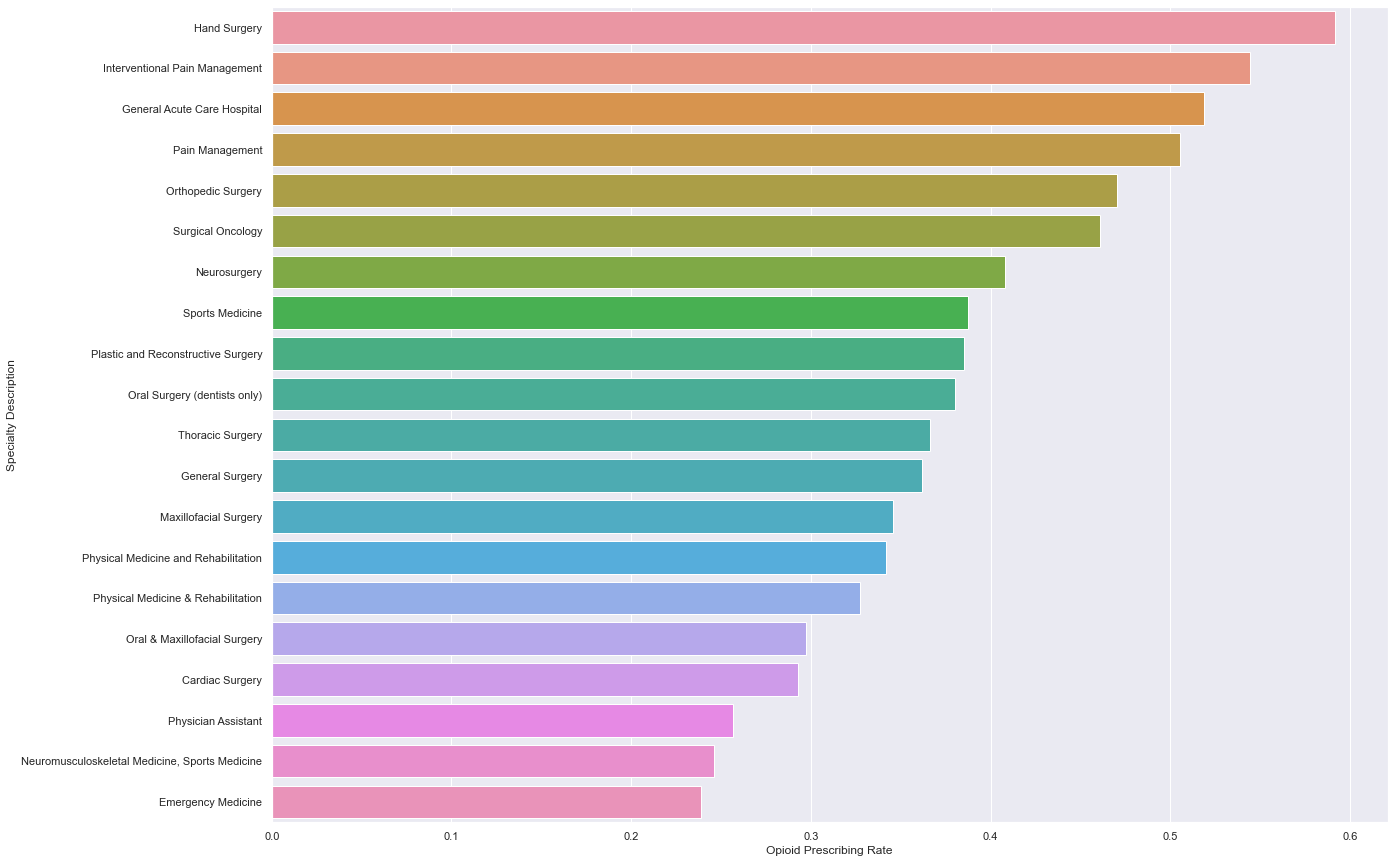

In [257]:
sns.barplot(data=df4,y='Specialty Description',x = 'Opioid Prescribing Rate')
sns.set(rc={'figure.figsize':(25,20)})